In [65]:
import pandas as pd
import numpy as np
import matplotlib

In [66]:
import sys
sys.path.insert(1, sys.path[0].replace('analysis', 'src'))
from k_nearest_neighbors import KNearestNeighborsClassifier

In [67]:
data_df = pd.read_csv('./book-data.csv')
data_list = [[row[col] for col in data_df.columns]
                     for row in data_df.to_dict('records')]
classifications = [row[-1] for row in data_list]
min_of_cols_by_index = {i: min([row[i] for row in data_list])
                        for i in range(len(data_list[0]) - 1)}
max_of_cols_by_index = {i: max([row[i]for row in data_list])
                        for i in range(len(data_list[0]) - 1)}
k_values = range(1, 100, 2)
# for row in data_list:
#     row.pop(-1)

In [68]:
k_dict = {}
for k in range(1, 100, 2):
    k_dict[k] = 0
    k_nearest = KNearestNeighborsClassifier(k)
    for i in range(len(data_list)):
        current_point = data_list[i]
        data_list.pop(i)
        k_nearest.fit([row[:-1] for row in data_list], [row[-1] for row in data_list])
        classification = k_nearest.classify(current_point[:-1])
        if classification == current_point[-1]:
            k_dict[k] += 1
        data_list.insert(i, current_point)

In [69]:
unscaled_accuracy = [k_dict[k] / len(data_list) for k in k_values]

In [70]:
simple_scaled_data = [[] for row in data_list]
for i in range(len(data_list)):
    current_row = data_list[i][:-1]
    for j in range(len(current_row)):
        max_of_current_col = max_of_cols_by_index[j]
        current_row[j] = current_row[j] / max_of_current_col
    simple_scaled_data[i] = current_row

In [71]:
k_dict = {}
for k in range(1, 100, 2):
    k_dict[k] = 0
    k_nearest = KNearestNeighborsClassifier(k)
    for i in range(len(simple_scaled_data)):
        current_point = simple_scaled_data[i]
        simple_scaled_data.pop(i)
        k_nearest.fit(simple_scaled_data, classifications)
        classification = k_nearest.classify(current_point)
        if classification == classifications[i]:
            k_dict[k] += 1
        simple_scaled_data.insert(i, current_point)

simple_scaled_accuracy = [k_dict[k] / len(data_list) for k in k_values]

In [72]:
min_maxed_data = [[] for row in data_list]

for i in range(len(data_list)):
    current_point = data_list[i][:-1]
    for j in range(len(current_point)):
        max_of_current_col = max_of_cols_by_index[j]
        min_of_current_col = min_of_cols_by_index[j]
        current_point[j] = (current_point[j] - min_of_current_col) / (max_of_current_col - min_of_current_col)
    min_maxed_data[i] = current_point

In [73]:
k_dict = {}
for k in range(1, 100, 2):
    k_dict[k] = 0
    k_nearest = KNearestNeighborsClassifier(k)
    for i in range(len(min_maxed_data)):
        current_point = min_maxed_data[i]
        min_maxed_data.pop(i)
        k_nearest.fit(min_maxed_data, classifications)
        classification = k_nearest.classify(current_point)
        if classification == classifications[i]:
            k_dict[k] += 1
        min_maxed_data.insert(i, current_point)

min_maxed_accuracy = [k_dict[k] / len(data_list) for k in k_values]

In [74]:
data_by_col = {0: [row[0] for row in data_list], 1: [row[1] for row in data_list], 2: [row[2] for row in data_list], 3: [row[3] for row in data_list]}
mean_by_col = {col: np.mean(data_by_col[col]) for col in data_by_col}
std_by_col = {col: np.std(data_by_col[col]) for col in data_by_col}

In [75]:
zscored_data = [[] for row in data_list]
for i in range(len(data_list)):
    for j in range(len(data_list[0]) - 1):
        zscored_data[i].append((data_by_col[j][i] - mean_by_col[j]) / std_by_col[j])

In [76]:
k_dict = {}
for k in range(1, 100, 2):
    k_dict[k] = 0
    k_nearest = KNearestNeighborsClassifier(k)
    for i in range(len(zscored_data)):
        current_point = zscored_data[i]
        zscored_data.pop(i)
        k_nearest.fit(zscored_data, classifications)
        classification = k_nearest.classify(current_point)
        if classification == classifications[i]:
            k_dict[k] += 1
        zscored_data.insert(i, current_point)

zscored_accuracy = [k_dict[k] / len(data_list) for k in k_values]

<AxesSubplot:xlabel='k', ylabel='zscored accuracy'>

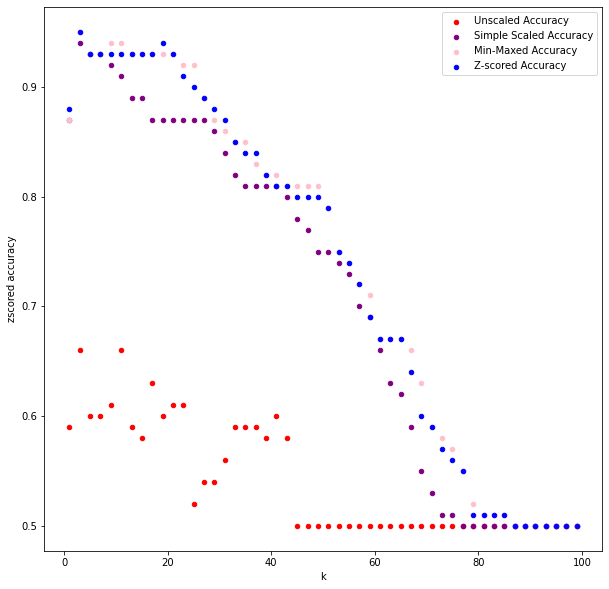

In [86]:
accuracy_df = pd.DataFrame({'k': k_values, 'unscaled accuracy': unscaled_accuracy, 'simple scaled accuracy': simple_scaled_accuracy, 'min maxed accuracy': min_maxed_accuracy, 'zscored accuracy': zscored_accuracy})
unscaled_plot = accuracy_df.plot(x='k', y='unscaled accuracy', label='Unscaled Accuracy', kind='scatter', color='red')
simple_scaled_plot = accuracy_df.plot(x='k', y='simple scaled accuracy', label='Simple Scaled Accuracy', ax=unscaled_plot, kind='scatter', color='purple')
min_maxed_plot = accuracy_df.plot(x='k', y='min maxed accuracy', label='Min-Maxed Accuracy', ax=simple_scaled_plot, kind='scatter', color='pink')
accuracy_df.plot(x='k', y='zscored accuracy', label='Z-scored Accuracy', ax=min_maxed_plot, kind='scatter', color='blue', figsize=(10, 10))